In [66]:
library(data.table)
library(ggplot2)

In [3]:
files = list.files("bulkATAC_DE")

In [8]:
# exclude combinatorial treatments
files = files[!grepl("_", files)]

In [27]:
d = lapply(files, function(f) {
    tab = fread(paste0("bulkATAC_DE/", f))
    
    treatment = strsplit(f, "[.]")[[1]][1]
    tab$treatment = treatment
    return(tab)
})

Warning message in fread(paste0("bulkATAC_DE/", f)):
“Detected 6 column names but the data has 7 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread(paste0("bulkATAC_DE/", f)):
“Detected 6 column names but the data has 7 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread(paste0("bulkATAC_DE/", f)):
“Detected 6 column names but the data has 7 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correc

In [31]:
# Combine differential expression statistics tables
d = rbindlist(d)

In [37]:
# Filter significant 
sum(d$padj < 0.01 & abs(d$log2FoldChange) > 1.0, na.rm=TRUE)

[1] 29551

In [32]:
head(d)

V1,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,treatment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
"chr12:112978182-112978682,OAS2,Promoter",5613.687,3.201410,0.16709390,19.15935,8.088135e-82,1.187913e-76,IFNa
"chr19:17405416-17405916,BST2,Promoter",3253.271,3.549434,0.19423293,18.27411,1.330462e-74,9.770311e-70,IFNa
"chr8:143026243-143026743,LY6E-DT,Distal",6298.065,2.119271,0.11848939,17.88575,1.522983e-71,7.456067e-67,IFNa
"chr10:89310018-89310518,IFIT2,Intronic",1901.075,3.711045,0.23822145,15.57813,1.025048e-54,3.763744e-50,IFNa
"chr21:41425999-41426499,MX1,Exonic",3732.942,2.446378,0.17238757,14.19115,1.039390e-45,3.053124e-41,IFNa
"chr1:1013058-1013558,AGRN,Intronic",9585.103,1.370347,0.09886264,13.86112,1.089539e-43,2.667028e-39,IFNa


In [38]:
d = d[d$padj < 0.01 & abs(d$log2FoldChange) > 1.0, ]

In [58]:
counts_up = table(d$treatment[d$log2FoldChange > 0])

In [59]:
counts_down = table(d$treatment[d$log2FoldChange < 0])

In [60]:
counts_up


 IFNa  IFNg  IL13 IL17A  IL1B  IL22   IL6   OSM TGFb1  TNFa 
  430  2817   605    19  3192     1     1  1925  2418  5234 

In [61]:
counts_up = data.frame(counts_up)
colnames(counts_up) = c("stimulation", "n")
counts_up$dir = "open"

In [62]:
counts_down = data.frame(counts_down)
colnames(counts_down) = c("stimulation", "n")
counts_down$dir = "close"

In [65]:
counts = rbind(counts_up, counts_down)

In [67]:
counts$stimulation = factor(counts$stimulation, levels=c("IFNa","IFNg", "IL13", "IL17A", "IL1B","IL22", "IL6", "OSM", "TGFb1", "TNFa", "unstimulated"))

In [68]:
counts

stimulation,n,dir
<fct>,<int>,<chr>
IFNa,430,open
IFNg,2817,open
IL13,605,open
IL17A,19,open
IL1B,3192,open
IL22,1,open
IL6,1,open
OSM,1925,open
TGFb1,2418,open


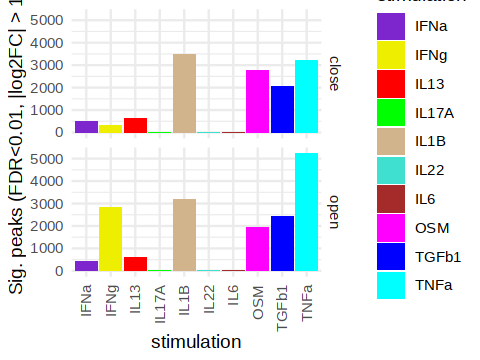

In [101]:
width = 4; height = 3
options(repr.plot.width = width, repr.plot.height = height)


ggplot(counts, aes(x=stimulation, y=n, fill=stimulation)) +
    facet_grid(dir~.) +
    geom_bar(stat="identity") +
    scale_fill_manual(values=c("purple3", "yellow2","red","green","tan","turquoise",'brown',"magenta","blue",'cyan',"black"))+
    theme_minimal() +
    ylab("Sig. peaks (FDR<0.01, |log2FC| > 1)") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggsave("figures_2/bulkATACcytokines_barplot.pdf", width=width, height=height)